$H(f,f_n,\zeta)=\frac{1}{(2\pi)^2(f^2-f_n^2+j2\zeta f f_n)}$

$|H(f,f_n,\zeta)|=\frac{1}{(2\pi)^2\sqrt{((f^2-f_n^2)^2+(2\zeta f f_n)^2)}}$

$z(f,f_n,\zeta)=|H(f,f_n,\zeta)| \ddot{y}(f,f_n,\zeta)$

$W_{z}(f,f_n,\zeta)=|H(f,f_n,\zeta)|^2W_{\ddot{y}}(f)$

$S_a=K\cdot |z|$

$W_{S_a}(f,f_n,\zeta)=K^2 \cdot W_{z}(f,f_n,\zeta)$

$M_n=\int_0^{\infty} f^nW(f)df$

## 1. BLWN

$W_{\ddot{y}}(f)=\begin{cases}
A && f_1 \leq f \leq f_2 \\
0 && otherwise
\end{cases}$

$W_{z}(f)=\begin{cases}
A\frac{1}{(2\pi)^4((f^2-f_n^2)^2+(2\zeta f f_n)^2)} && f_1 \leq f \leq f_2 \\
0 && otherwise
\end{cases}$

$W_{S_a}(f,f_n,\zeta)=AK^2\frac{1}{(2\pi)^4((f^2-f_n^2)^2+(2\zeta f f_n)^2)}$

### 1.1 Moments

$M_0=A\frac{K^2}{(2\pi)^4}\int_{f_1}^{f_2}\frac{1}{(f^2-f_n^2)^2+(2\zeta f f_n)^2}df$

In [2]:
from sympy import *

init_printing()
f, fn, z, f1, f2= symbols('f fn zeta f1 f2')

In [16]:
expr1 = (f**2-fn**2)**2+(2*z*f*fn)**2

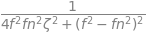

In [17]:
# 적분대상식
expr=1/expr1
expr

In [18]:
# 4차식을 2차식 곱으로
expr2 = f**2 + 2*sqrt(1-z**2)*f*fn+ fn**2
expr3 = f**2 - 2*sqrt(1-z**2)*f*fn + fn**2

In [19]:
# 동일식인지 확인
expand(expr2*expr3-expr1)==0

True

In [6]:
# 부분분수 분자 계수
A,B=symbols('A B')

In [21]:
expr4=(A*f+B*fn)/expr2-(A*f-B*fn)/expr3

In [22]:
expr5=cancel(expr4)

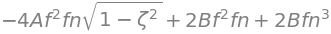

In [23]:
numer(expr5)

In [24]:
# 분자 = 1
eq=Eq(numer(expr5),1)

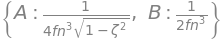

In [25]:
# 부분분수 계수찾기
solve_undetermined_coeffs(eq, [A,B], f)

In [22]:
A=1/(4*fn**3*sqrt(1-z**2))
B=1/(2*fn**3)

In [23]:
expr1= (A*f+B*fn)/expr2
expr2= (A*f-B*fn)/expr3

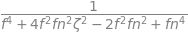

In [24]:
simplify((expr1-expr2))

In [25]:
# 부분분수가 기존분수와 같은지 확인
simplify((expr1-expr2)-expr)==0

True

In [26]:
# 각 부분분수 적분
expr3=integrate(expr1,f,manual=True)

In [27]:
expr4=integrate(expr2,f,manual=True)

In [28]:
# 최종적분식
iexpr=expr3-expr4

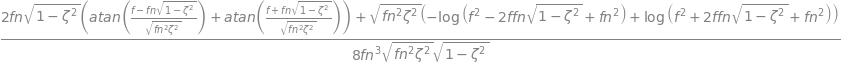

In [29]:
simplify(iexpr)

In [30]:
init_printing(pretty_print=False)
simplify(iexpr)

(2*fn*sqrt(1 - zeta**2)*(atan((f - fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2)) + atan((f + fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2))) + sqrt(fn**2*zeta**2)*(-log(f**2 - 2*f*fn*sqrt(1 - zeta**2) + fn**2) + log(f**2 + 2*f*fn*sqrt(1 - zeta**2) + fn**2)))/(8*fn**3*sqrt(fn**2*zeta**2)*sqrt(1 - zeta**2))

In [32]:
def M0(A,K,f1,f2,fn,zeta):
    def intF(f,fn,zeta):
        return (2*fn*sqrt(1 - zeta**2)*(atan((f - fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2)) + atan((f + fn*sqrt(1 - zeta**2))/sqrt(fn**2*zeta**2))) + sqrt(fn**2*zeta**2)*(-log(f**2 - 2*f*fn*sqrt(1 - zeta**2) + fn**2) + log(f**2 + 2*f*fn*sqrt(1 - zeta**2) + fn**2)))/(8*fn**3*sqrt(fn**2*zeta**2)*sqrt(1 - zeta**2));
    out = intF(f2,fn,zeta)
    out -= intF(f1,fn,zeta)
    out *= A*K**2
    out /= (2*pi)**4
    return out;

$M_1=A\frac{K^2}{(2\pi)^4}\int_{f_1}^{f_2}\frac{f}{(f^2-f_n^2)^2+(2\zeta f f_n)^2}df$

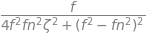

In [34]:
expr *= f
expr

In [38]:
iexpr=integrate(expr,f,manual=True)

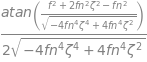

In [39]:
iexpr

In [34]:
init_printing(pretty_print=False)
iexpr

NameError: name 'iexpr' is not defined

In [42]:
def M1(A,K,f1,f2,fn,zeta):
    def intF(f,fn,zeta):
        return atan((f**2 + 2*fn**2*zeta**2 - fn**2)/sqrt(-4*fn**4*zeta**4 + 4*fn**4*zeta**2))/(2*sqrt(-4*fn**4*zeta**4 + 4*fn**4*zeta**2))
    out = intF(f2,fn,zeta)
    out -= intF(f1,fn,zeta)
    out *= A*K**2
    out /= (2*pi)**4
    return out;

$M_2=A\frac{K^2}{(2\pi)^4}\int_{f_1}^{f_2}\frac{f^2}{(f^2-f_n^2)^2+(2\zeta f f_n)^2}df$

In [26]:
init_printing()
expr1 = (f**2-fn**2)**2+(2*z*f*fn)**2

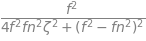

In [42]:
expr=f**2/expr1
expr

In [28]:
expr2 = f**2 + 2*sqrt(1-z**2)*f*fn + fn**2
expr3 = f**2 - 2*sqrt(1-z**2)*f*fn + fn**2

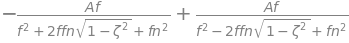

In [67]:
# 부분분수 분자 계수
A,B=symbols('A B')
expr4=(A*f)/expr3-(A*f)/expr2
expr4

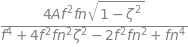

In [31]:
expr5=cancel(expr4); expr5

In [32]:
eq=Eq(numer(expr5),f**2)

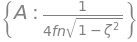

In [33]:
solve_undetermined_coeffs(eq, [A], f)

In [36]:
init_printing(pretty_print=False)
_

{A: 1/(4*fn*sqrt(1 - zeta**2))}

In [44]:
A = 1/(4*fn*sqrt(1-z**2))

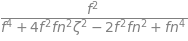

In [47]:
init_printing()
expr6=(A*f)/expr3-(A*f)/expr2
simplify(expr6)

In [46]:
simplify(expr6-expr)==0

True

In [34]:
expr1= (A*f)/expr3
expr2= (A*f)/expr2

In [49]:
expr3= integrate(expr1,f,manual=True)
expr4= integrate(expr2,f,manual=True)

In [52]:
iexpr=simplify(expr3-expr4)

In [54]:
iexpr

f*(3*f**4 + 20*f**2*fn**2*zeta**2 - 10*f**2*fn**2 - 5*f**2 - 15*f*fn*sqrt(1 - zeta**2) + 15*fn**4 - 15*fn**2)/15

In [53]:
init_printing(pretty_print=False)
iexpr

f*(3*f**4 + 20*f**2*fn**2*zeta**2 - 10*f**2*fn**2 - 5*f**2 - 15*f*fn*sqrt(1 - zeta**2) + 15*fn**4 - 15*fn**2)/15

In [56]:
def M2(A,K,f1,f2,fn,zeta):
    def intF(f,fn,zeta):
        return f*(3*f**4 + 20*f**2*fn**2*zeta**2 - 10*f**2*fn**2 - 5*f**2 - 15*f*fn*sqrt(1 - zeta**2) + 15*fn**4 - 15*fn**2)/15
    out = intF(f2,fn,zeta)
    out -= intF(f1,fn,zeta)
    out *= A*K**2
    out /= (2*pi)**4
    return out;

M4

In [57]:
expr=f**4/((f**2-fn**2)**2+4*fn**2*z**2*f**2)

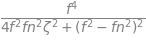

In [59]:
init_printing()
expr

In [65]:
expr2 = f**2 + 2*sqrt(1-z**2)*f*fn + fn**2
expr3 = f**2 - 2*sqrt(1-z**2)*f*fn + fn**2

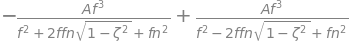

In [70]:
# 부분분수 분자 계수
A,B=symbols('A B')
expr4=(A*f**3)/expr3-(A*f**3)/expr2
expr4

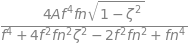

In [71]:
expr5=cancel(expr4); expr5

In [72]:
eq=Eq(numer(expr5),f**4)

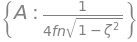

In [73]:
solve_undetermined_coeffs(eq, [A], f)

In [74]:
A = 1/(4*fn*sqrt(1-z**2))

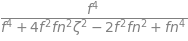

In [76]:
init_printing()
expr6=(A*f**3)/expr3-(A*f**3)/expr2
simplify(expr6)

In [77]:
simplify(expr6-expr)==0

True

In [78]:
expr1= (A*f**3)/expr3
expr2= (A*f**3)/expr2

In [90]:
expr3= integrate(expr1,f,manual=True)
expr4= integrate(expr2,f,manual=True)

In [91]:
iexpr=simplify(expr3-expr4)

In [92]:
init_printing(pretty_print=False)
iexpr

(4*f*fn*sqrt(1 - zeta**2) - (-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f - 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) + (-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f + 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) - (-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f - 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta*

In [95]:
def M4(A,K,f1,f2,fn,zeta):
    def intF(f,fn,zeta):
        return (4*f*fn*sqrt(1 - zeta**2) - (-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f - 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) + (-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f + 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 - fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) - (-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f - 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)) + (-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))*log(f + 2*fn*zeta**2*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) - fn*sqrt(1 - zeta**2)/(4*zeta**4 - 5*zeta**2 + 1) + 2*zeta**2*sqrt(1 - zeta**2)*(-fn**2*(4*zeta**2 - 3)/2 + fn**2*sqrt((zeta - 1)*(zeta + 1))*(2*zeta - 1)*(2*zeta + 1)/(2*zeta))/(4*fn*zeta**4 - 5*fn*zeta**2 + fn)))/(4*fn*sqrt(1 - zeta**2))
    out = intF(f2,fn,zeta)
    out -= intF(f1,fn,zeta)
    out *= A*K**2
    out /= (2*pi)**4
    return out;

M0.5

$M_{0.5}=A\frac{K^2}{(2\pi)^4}\int_{f_1}^{f_2}\frac{f^{1/2}}{(f^2-f_n^2)^2+(2\zeta f f_n)^2}df$

$f^{1/2}=u$

$df = 2udu$

$\frac{f^{1/2}}{(f^2-f_n^2)^2+(2\zeta f f_n)^2}=
2\frac{u^2}{(u^4-f_n^2)^2+(2\zeta u^2 f_n)^2}$

In [20]:
A, B, C, D, E, F =symbols('A B C D E F')
G, H = symbols('G H')
u= symbols('u')
expr1 = (u**4-fn**2)**2+(2*z*u**2*fn)**2

In [18]:
expr2 = u**4 + 2*sqrt(1-z**2)*u**2*fn + fn**2
expr3 = u**4 - 2*sqrt(1-z**2)*u**2*fn + fn**2

In [19]:
simplify(expr2*expr3-expr1)==0

True

In [21]:
expr4=(A*u**3+B*u**2+C*u+D)/expr3-(E*u**3+F*u**2+G*u+H)/expr2

In [22]:
eq=Eq(simplify(expr4),u**2)

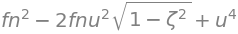

In [12]:
expr3

In [24]:
solve_undetermined_coeffs(eq, [A,B,C,D,E,F,G,H], u)